In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report


In [38]:
np.random.seed(42)
n_samples = 300

data = {
    'BMI': np.random.normal(25, 5, n_samples),  # mean BMI = 25
    'ExerciseFrequency': np.random.randint(0, 7, n_samples),  # times per week
    'HealthyEatingScore': np.random.randint(1, 11, n_samples),  # 1-10 scale
}

df = pd.DataFrame(data)

In [39]:
def assign_risk(row):
    if row['BMI'] > 30 or row['ExerciseFrequency'] < 1 or row['HealthyEatingScore'] < 4:
        return 'high'
    elif 25 <= row['BMI'] <= 30 and row['ExerciseFrequency'] <= 3:
        return 'medium'
    else:
        return 'low'

df['RiskCategory'] = df.apply(assign_risk, axis=1)


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RiskCategoryEncoded'] = le.fit_transform(df['RiskCategory'])  # low=1, medium=2, high=0 (random)


In [41]:
X = df[['BMI', 'ExerciseFrequency', 'HealthyEatingScore']]
y = df['RiskCategoryEncoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:
y_pred = clf.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print("Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Evaluation Metrics:
Accuracy:  1.00
Precision: 1.00
Recall:    1.00

Classification Report:
              precision    recall  f1-score   support

        high       1.00      1.00      1.00        28
         low       1.00      1.00      1.00        21
      medium       1.00      1.00      1.00        11

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



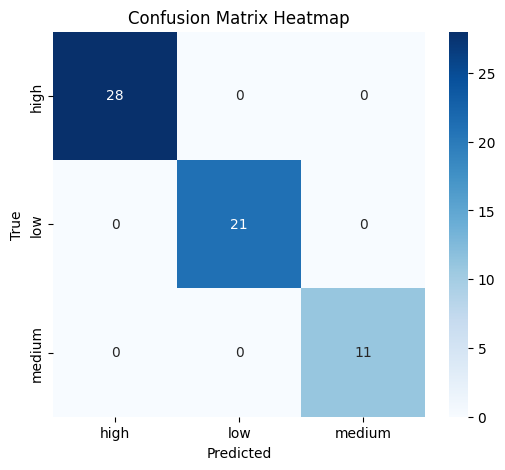

In [36]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()